## Generate 2d data. ideally cluster it up a bit

In [1]:
import numpy as np
import matplotlib.pyplot as plt


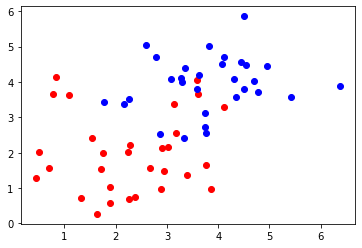

In [2]:
dist1 = np.round(np.random.normal(scale=1, size=(30,2)) + np.array([2,2]), 2)
dist2 = np.round(np.random.normal(scale=1, size=(30,2)) + np.array([4,4]), 2)
plt.plot(dist1[:,0],dist1[:,1], 'ro')
plt.plot(dist2[:,0],dist2[:,1], 'bo')
X = np.concatenate((dist1, dist2), axis=0)

## K means

### functions

In [3]:
def assign(X, centroids):
    # returns vector of indexes of centroids that X are closest to
    K = centroids.shape[0]
    idx = np.zeros((X.shape[0], 1))
    diffs = np.zeros((X.shape[0], K))
    for i in range(K):
        diffs[:, i] = np.sum(np.square((X - centroids[i,:])), 1)
    idx = np.argmin(diffs, axis=1)
    return idx


def computeCentroids(X, idx, K):
    n = X.shape[1]
    centroids = np.zeros((K, n))
    for index in range(0,K):
        centroids[index,:] = np.mean(X[idx == index,:], axis=0)
    return centroids


def kmeans_inner(X, given_centroids, inner_iters, K):
    # initialize find_centroids to random X's.
    find_centroids = X[np.random.permutation(K - given_centroids.shape[0])]
    
    all_centroids = np.concatenate((given_centroids, find_centroids), axis=0)
    for i in range(inner_iters):
        idx = assign(X, all_centroids)
        updated_centroids = computeCentroids(X, idx, K)
        all_centroids = np.concatenate((given_centroids, updated_centroids[[given_centroids.shape[0]],:]), axis=0)
    
    return all_centroids

def calculate_cost(X, centroids):
    idx = assign(X, centroids)
    return np.sum(np.square(X - centroids[idx]))

def kmeans(X, given_centroids, K, inner_iters, outer_iters):
    # X: data
    # given_centroids: fixed centroids
    # K: total centroids
    # inner_iters: iterations for each k-means run
    # outer_iters: number of times to run k-means to take the best from

    # run kmeans_inner out_iters times
    # get the cost for the result
    # take the result with lowest cost
    output = []
    cost = np.zeros(outer_iters)
    
    for i in range(outer_iters):
        output.append(kmeans_inner(X, given_centroids, inner_iters, K))
        cost[i] = calculate_cost(X, output[i])
    plt.plot(cost)
    plt.show()
    return output[np.argmin(cost)]



### Do it

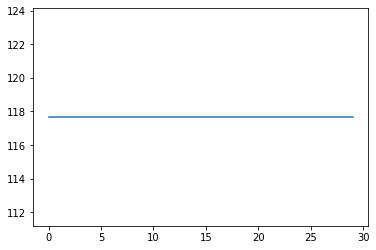

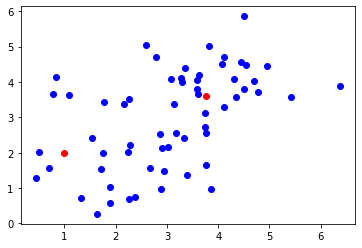

In [4]:
given_centroids = np.array([[1,2]])
centroids = kmeans(X,given_centroids,2,30,30)
plt.plot(centroids[:,0],centroids[:,1], 'ro')
plt.plot(X[:,0],X[:,1], 'bo')

As the random variables were distributed around 2,2 and 4,4, I expect the normal k means to find 2,2. When setting one given to 1,2, I expect the 4,4 one to be shifted left.

In [6]:
centroids

array([[1.        , 2.        ],
       [3.76717949, 3.59230769]])